# Coding Convolutional Neural Networks in tensorflow/keras


## Objective:

We want to implement a Convolutional Neural Network (CNN) to do image classification. For this we will use two well-known image datasets :

###MNIST

Mnist is a dataset of 60,000 28$\times$28 greyscale images of handwritten digits.

### CIFAR 10


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


# Load packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
print(tf.keras.__version__)


2.5.0


## Import data

We are going to start with the mnist dataset. The mnist dataset has 10 classes which go from "0" to "9" (all the digits). We are going to truncate the number of elements in the database for faster training.


In [2]:

from keras.datasets import mnist
(X_train, Y_train_scalar), (X_test, Y_test_scalar) = mnist.load_data()

n_max = 5000
X_train = X_train[0:n_max,:,:]
X_test = X_test[0:n_max,:,:]
Y_train_scalar = Y_train_scalar[0:n_max]
Y_test_scalar = Y_test_scalar[0:n_max]

mnist_label_list = [ '0', '1','2','3','4','5','6','7','8','9']

print(X_train.shape)
print(X_test.shape)
print(np.unique(Y_train_scalar))

11501568/11490434 [==============================] - 0s 0us/step
(5000, 28, 28)
(5000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


Now, let's look at some of the data :

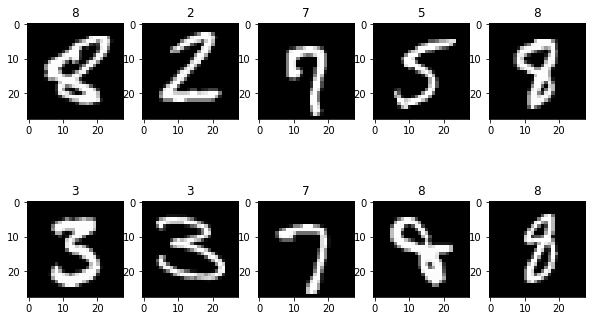

In [3]:
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_train.shape[0])
    plt.imshow(X_test[rand_ind,:,:],cmap='gray')
    plt.title(mnist_label_list[int(Y_test_scalar[rand_ind])])


Now, we carry out some data pre-processing. In particular, we normalise the data to the range $[0,1]$ and convert the labels to a one-hot encoding :

In [4]:
# input image dimensions (mnist data is grey-level)
img_rows, img_cols, nb_channels = X_train.shape[1], X_train.shape[2], 1

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(Y_train_scalar)
Y_test = to_categorical(Y_test_scalar)

# number of classes
nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There are {} train data'.format(X_train.shape[0]))
print('There are {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)


X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
There are 5000 train data
There are 5000 test data
28 28 1


## Defining the model for MNIST

We will now define the simple CNN described below, for use with MNIST. The input of the CNN is a set of (28,28,1) image tensors. We apply :

    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2)
    
    - We then Flatten the data 
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)

We define the parameters of the model :

In [5]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

# --- Size of the successive layers
n_h_0 = nb_channels  # number of input channels
n_h_1 = nb_filters
n_h_2 = nb_filters

## Creating the CNN model using the Sequential API



In [6]:


model = Sequential()
model.add(Conv2D(nb_filters, kernel_size,padding='same',strides=(1,1) ,input_shape=(28,28,1), name='Conv1'))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size,padding='same',strides=(1,1),input_shape=(28,28,1), name='Conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size,strides=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [7]:
# We compile, train and evaluate the model


# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
# display model
model.summary()
# fit model
model.fit(X_train, Y_train,batch_size=batch_size,epochs=n_epochs, validation_data=(X_test,Y_test))       

score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

## 2/ CNN on CIFAR10

 We create the following network :

    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) 
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same'
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) 
    
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)



### Import data

In [8]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train_scalar), (X_test, Y_test_scalar) = cifar10.load_data()

print("Train data shape : ", X_train.shape)
print("Test data shape : ", X_test.shape)
print("Number of data categories : ", np.unique(Y_train_scalar))

170500096/170498071 [==============================] - 11s 0us/step
Train data shape :  (50000, 32, 32, 3)
Test data shape :  (10000, 32, 32, 3)
Number of data categories :  [0 1 2 3 4 5 6 7 8 9]


The CIFAR-10 dataset has 10 classes. These are the following :

In [9]:
cifar_10_list = [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### Some of the images

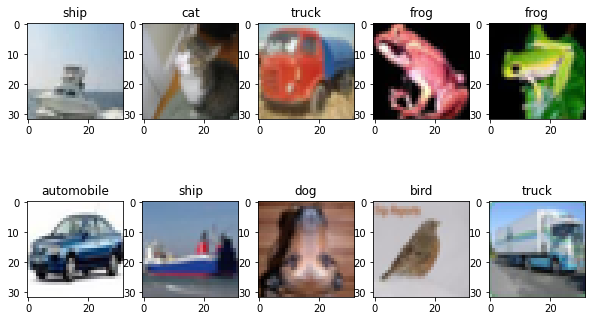

In [10]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(X_train[i, :, :, :])
    plt.title(cifar_10_list[int(Y_train_scalar[i])])

## Format conversion

In [11]:
# input image dimensions
img_rows, img_cols, nb_channels = 32, 32, 3
nb_classes = 10

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert to one-hot encoding
Y_train = to_categorical(Y_train_scalar)
Y_test = to_categorical(Y_test_scalar)

print('X_train shape:', X_train.shape)
print('Y_train_scalar shape:', Y_train_scalar.shape)
print('Y_train shape (one hot encoding):', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)

X_train shape: (50000, 32, 32, 3)
Y_train_scalar shape: (50000, 1)
Y_train shape (one hot encoding): (50000, 10)
There is 50000 train data
There is 10000 test data
32 32 3


For computational reasons, we are going to reduce the amount of training data :

In [12]:
n_train_samples = 10000
X_train = X_train[0:n_train_samples,:,:,:]
Y_train = Y_train[0:n_train_samples,:]
print(X_train.shape)
print(Y_train.shape)

(10000, 32, 32, 3)
(10000, 10)




We are now going to create the model described just above, and train it on the previously loaded CIFAR dataset.

## We define the parameters of the model, and of the training

In [13]:

learning_rate = 0.01
n_epochs = 20
batch_size = 64
# number of convolutional filters to use
nb_filters = 32 

# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)


# --- Size of the successice layers
n_h_0 = nb_channels
n_h_1 = nb_filters
n_h_2 = nb_filters
n_h_3 = nb_filters

input_shape = (img_rows, img_cols, nb_channels)


Now, we define the model :

In [14]:
model = Sequential()
model.add(Conv2D(nb_filters, kernel_size,padding='same',strides=(1,1) ,input_shape=(32,32,3), name='Conv1'))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size,padding='same',strides=(1,1),input_shape=(32,32,3), name='Conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size,strides=(2,2)))
model.add(Conv2D(nb_filters, kernel_size,padding='same',strides=(1,1),input_shape=(32,32,3), name='Conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size,strides=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


we compile, display and train the model

In [15]:
# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
# display model
model.summary()
# fit model
model.fit(X_train, Y_train,batch_size=batch_size,epochs=n_epochs, validation_data=(X_test,Y_test))       


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)       

We evaluate the performances of the model on the test data




In [16]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5139050483703613
Test accuracy: 0.6021000146865845


### The network's results

Let's take a look at what the network has learned.

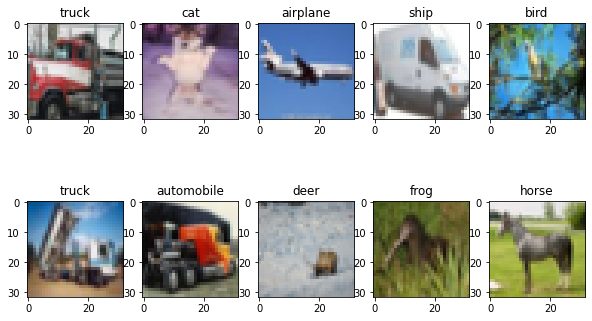

In [18]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    predicted_class =np.argmax(model.predict(np.expand_dims(X_test[rand_ind],0) ,batch_size=batch_size))# FILL IN CODE
    plt.imshow(X_test[rand_ind,:,:,:])
    plt.title(cifar_10_list[int(predicted_class)])